In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [12]:
stock2index = {
    "Tesco": "TSCO.L",
    "HSBC": "HSBC",
    "Microsoft": "MSFT",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "BP": "BP",
    "EasyJet": "EZJ.L",
    "Aviva": "AV.L",
    "Legal&General": "LGEN.L",
    "IBM": "IBM",
    "Fairfax": "FFH.TO",
    "Blackstone": "BX",
    "LloydsBank": "LYG",
    "JPMorgan": "JPM"
}

In [13]:
stock_list = [v for v in stock2index.values()]

df = yf.download(stock_list, "2016-01-01")

[*********************100%***********************]  14 of 14 completed


In [14]:
df.head(15)

Adj Close                                                 \
                  AV.L         BP         BX        EZJ.L      FFH.TO   
Date                                                                    
2016-01-04  328.095581  21.138393  20.128340  1419.970215  595.009766   
2016-01-05  329.678009  21.049925  19.565163  1440.407227  591.107849   
2016-01-06  326.579071  20.621170  18.974176  1437.137329  595.185059   
2016-01-07  317.743683  20.029072  18.341465  1364.381348  604.961670   
2016-01-08  314.446930  19.675180  17.729628  1400.350586  601.340332   
2016-01-11  312.337006  19.627542  17.138638  1404.437988  606.162903   
2016-01-12  316.952484  19.498234  17.500181  1406.072876  619.245056   
2016-01-13  317.677734  19.579903  16.999586  1381.548462  597.903198   
2016-01-14  312.930389  20.981873  17.826967  1342.309204  613.414185   
2016-01-15  306.270874  19.845322  17.076071  1317.784668  622.541870   
2016-01-18  305.347778        NaN        NaN  1308.792358  617.526001   
2016-01-19  313.062256  19.681988  16.693663  1334.134399  632.884827   
2016-01-20  296.908020  19.368925  16.512890  1325.142090  639.483826   
2016-01-21  303.303833  20.049492  16.797953  1332.499390  637.696228   
2016-01-22  311.216064  20.655197  18.223274  1340.674194  634.094482   

                                                                      ...  \
                  GOOG       HSBC         IBM        JPM      LGEN.L  ...   
Date                                                                  ...   
2016-01-04  741.840027  28.074566  104.120209  54.278229  175.544373  ...   
2016-01-05  742.580017  28.009090  104.043633  54.372082  177.238159  ...   
2016-01-06  743.619995  27.041502  103.522812  53.587177  173.647308  ...   
2016-01-07  726.390015  26.474043  101.753654  51.420135  167.617432  ...   
2016-01-08  714.469971  26.299440  100.811623  50.268372  166.668900  ...   
2016-01-11  716.030029  26.503147  102.037018  50.191586  165.855911  ...   
2016-01-12  726.070007  26.634098  101.784294  50.302490  166.465668  ...   
2016-01-13  700.559998  26.168489  100.459328  48.920372  167.752930  ...   
2016-01-14  714.719971  26.495867  101.791946  49.654091  166.126907  ...   
2016-01-15  694.450012  25.193628   99.586227  48.664425  161.994034  ...   
2016-01-18         NaN        NaN         NaN        NaN  161.926300  ...   
2016-01-19  701.789978  25.186354   98.115776  48.638821  165.652634  ...   
2016-01-20  698.450012  24.371546   93.329086  47.359074  158.335464  ...   
2016-01-21  706.590027  24.378819   94.133240  47.137253  159.825989  ...   
2016-01-22  725.250000  25.135427   93.819244  48.587631  161.248779  ...   

             Volume                                                            \
             FFH.TO       GOOG       HSBC         IBM         JPM      LGEN.L   
Date                                                                            
2016-01-04  27453.0  3272776.0  3553124.0   5229331.0  25386652.0  16944351.0   
2016-01-05  23872.0  1950691.0  1769827.0   3924793.0  16566703.0  13163572.0   
2016-01-06  22394.0  1947034.0  2970364.0   4310774.0  22960882.0  10970670.0   
2016-01-07  30328.0  2963741.0  3062873.0   7025500.0  27626478.0  21018463.0   
2016-01-08  28000.0  2450857.0  3396206.0   4762583.0  22366146.0  12428502.0   
2016-01-11  25117.0  2090621.0  2019227.0   4974236.0  20924492.0  11779164.0   
2016-01-12  33897.0  2024509.0  2430898.0   5078360.0  22969310.0  15594270.0   
2016-01-13  22196.0  2501730.0  4412792.0   4699338.0  28801522.0   9906656.0   
2016-01-14  34653.0  2225768.0  3038779.0   5709466.0  31294785.0  16432355.0   
2016-01-15  38594.0  3608109.0  5174404.0   9008047.0  37713689.0  16113060.0   
2016-01-18  13272.0        NaN        NaN         NaN         NaN   8274684.0   
2016-01-19  26433.0  2268078.0  2862774.0   9960287.0  22817090.0  11233746.0   
2016-01-20  34530.0  3444962.0  6271698.0  16157794.0  34644883.0  19850066.0   
2016-01-21  480

In [15]:
returns = df["Adj Close"].pct_change()
returns = returns.dropna()

returns.head(15)

,AV.L,BP,BX,EZJ.L,FFH.TO,GOOG,HSBC,IBM,JPM,LGEN.L,LYG,MSFT,NFLX,TSCO.L
Date,,,,,,,,,,,,,,
2016-01-05,0.004823,-0.004185,-0.027979,0.014393,-0.006558,0.000998,-0.002332,-0.000735,0.001729,0.009649,-0.004629,0.004562,-0.020917,0.015114
2016-01-06,-0.009400,-0.020368,-0.030206,-0.002270,0.006898,0.001400,-0.034546,-0.005006,-0.014436,-0.020260,-0.027907,-0.018165,0.093071,-0.019737
2016-01-07,-0.027054,-0.028713,-0.033346,-0.050626,0.016426,-0.023170,-0.020985,-0.017090,-0.040440,-0.034725,-0.023923,-0.034783,-0.026513,-0.016601
2016-01-08,-0.010376,-0.017669,-0.033358,0.026363,-0.005986,-0.016410,-0.006595,-0.009258,-0.022399,-0.005659,0.000000,0.003067,-0.027671,0.055316
2016-01-11,-0.006710,-0.002421,-0.033333,0.002919,0.008020,0.002184,0.007746,0.012155,-0.001528,-0.004878,0.009804,-0.000573,0.032139,-0.009871
2016-01-12,0.014777,-0.006588,0.021095,0.001164,0.021582,0.014022,0.004941,-0.002477,0.002210,0.003676,-0.009709,0.009178,0.014004,0.067033
2016-01-13,0.002288,0.004189,-0.028605,-0.017442,-0.034464,-0.035134,-0.017482,-0.013017,-0.027476,0.007733,-0.046569,-0.021599,-0.085950,0.019974
2016-01-14,-0.014944,0.071602,0.048671,-0.028402,0.025942,0.020212,0.012510,0.013265,0.014998,-0.009693,0.007712,0.028466,0.004692,0.061276
2016-01-15,-0.021281,-0.054168,-0.042121,-0.018270,0.014880,-0.028361,-0.049149,-0.021669,-0.019931,-0.024878,-0.035714,-0.039917,-0.028208,-0.021131


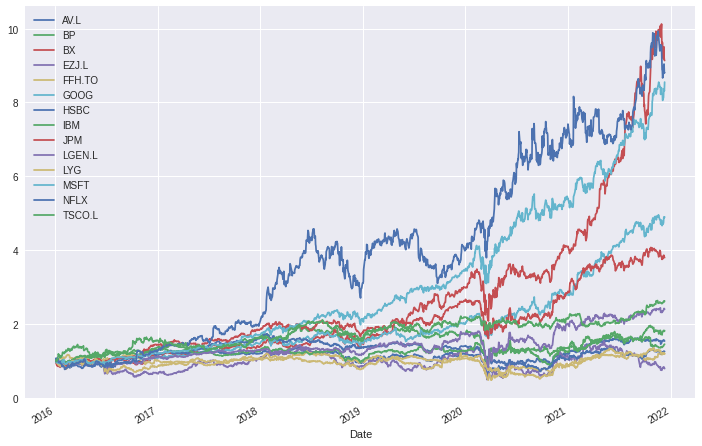

In [17]:
returns.cumsum().apply(np.exp).plot(figsize=(12,8))
plt.show()

## Find Maximum Drawdown

In [19]:
msft = returns["MSFT"].to_frame().copy()

msft.head(15)

,MSFT
Date,
2016-01-05,0.004562
2016-01-06,-0.018165
2016-01-07,-0.034783
2016-01-08,0.003067
2016-01-11,-0.000573
2016-01-12,0.009178
2016-01-13,-0.021599
2016-01-14,0.028466
2016-01-15,-0.039917


In [20]:
msft["creturns"] = msft.cumsum().apply(np.exp) # cumulative returns

In [21]:
msft["cummax"] = msft["creturns"].cummax() # cumulative maximum of creturns

In [22]:
msft.head(15)

,MSFT,creturns,cummax
Date,,,
2016-01-05,0.004562,1.004573,1.004573
2016-01-06,-0.018165,0.986489,1.004573
2016-01-07,-0.034783,0.952766,1.004573
2016-01-08,0.003067,0.955693,1.004573
2016-01-11,-0.000573,0.955145,1.004573
2016-01-12,0.009178,0.963952,1.004573
2016-01-13,-0.021599,0.943354,1.004573
2016-01-14,0.028466,0.970594,1.004573
2016-01-15,-0.039917,0.932614,1.004573


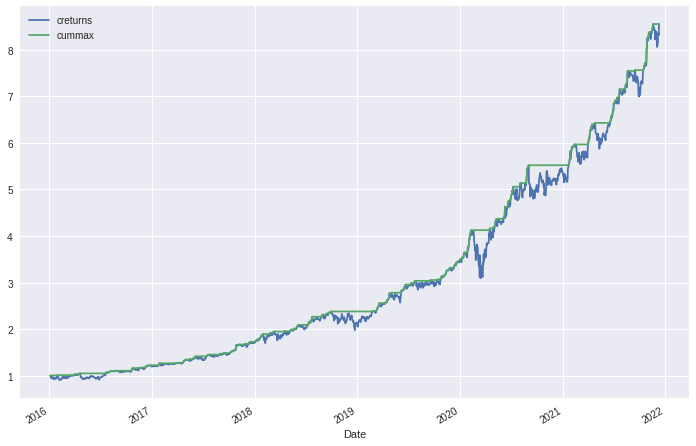

In [23]:
msft[["creturns", "cummax"]].plot(figsize=(12,8))
plt.show()

In [24]:
msft["drawdown"] = - (msft["creturns"] - msft["cummax"]) / msft["cummax"]

msft.head(15)

,MSFT,creturns,cummax,drawdown
Date,,,,
2016-01-05,0.004562,1.004573,1.004573,-0.000000
2016-01-06,-0.018165,0.986489,1.004573,0.018001
2016-01-07,-0.034783,0.952766,1.004573,0.051571
2016-01-08,0.003067,0.955693,1.004573,0.048657
2016-01-11,-0.000573,0.955145,1.004573,0.049202
2016-01-12,0.009178,0.963952,1.004573,0.040436
2016-01-13,-0.021599,0.943354,1.004573,0.060940
2016-01-14,0.028466,0.970594,1.004573,0.033824
2016-01-15,-0.039917,0.932614,1.004573,0.071631


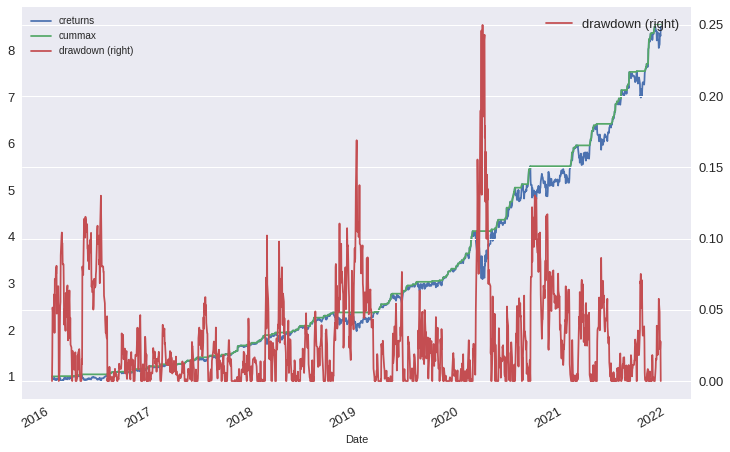

In [26]:
msft[["creturns", "cummax", "drawdown"]].plot(figsize=(12,8), 
                                              fontsize=13, 
                                              secondary_y="drawdown")
plt.legend(fontsize=13)
plt.show()

In [27]:
max_drawdown = msft["drawdown"].max()

max_drawdown

0.249853536844071

In [28]:
msft["drawdown"].idxmax()

Timestamp('2020-03-16 00:00:00')

In [29]:
msft.loc[msft["drawdown"].idxmax()]

MSFT       -0.147390
creturns    3.094149
cummax      4.124727
drawdown    0.249854
Name: 2020-03-16 00:00:00, dtype: float64

## Calmar Ratio

In [31]:
cagr = np.exp(msft["MSFT"].sum())**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1

cagr

0.43603683119256975

In [33]:
calmar = cagr / max_drawdown

calmar

1.7451697370395534

## drawdown duration

In [42]:
drawdown = msft["drawdown"].copy()

drawdown

Date
2016-01-05   -0.000000
2016-01-06    0.018001
2016-01-07    0.051571
2016-01-08    0.048657
2016-01-11    0.049202
                ...   
2021-12-06    0.048365
2021-12-07    0.022552
2021-12-08    0.022407
2021-12-09    0.027849
2021-12-10   -0.000000
Name: drawdown, Length: 1533, dtype: float64

In [43]:
begins = drawdown[drawdown == 0].index
len(begins)

283

In [44]:
ends = begins[1:]
ends = ends.append(pd.DatetimeIndex([drawdown.index[-1]]))
len(ends)

283

In [38]:
periods = ends - begins
periods

TimedeltaIndex(['24 days', '48 days', '12 days',  '1 days',  '1 days',
                 '1 days', '14 days',  '3 days', '93 days',  '2 days',
                ...
                 '4 days',  '1 days',  '1 days',  '4 days',  '8 days',
                 '1 days',  '1 days',  '1 days', '21 days',  '0 days'],
               dtype='timedelta64[ns]', length=283, freq=None)

In [46]:
max_drawdown_duration = periods.max()

max_drawdown_duration.days

148

## Compare stocks